# Assignment_5 : Multiple_Linear_Regression_50_Startup

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [23]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [24]:
df = pd.read_csv(r"D:\Data Science\Assignments DS\LMS Assignments DS\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [27]:
df.isna().sum() # No null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [28]:
# df.drop("State", axis = 1, inplace=True)
# df.columns

In [29]:
df1=df.rename({'R&D Spend':'RD', 'Marketing Spend' : 'Mrkt', 'Administration' : 'Adms','Profit' : 'Prft'}, axis=1)

In [30]:
df1[df1.duplicated()] # No Duplicates

,RD,Adms,Mrkt,State,Prft


# Correlation_Matrix

In [32]:
df1.corr()
# for profit and R&D Spend the value is 0.97, so we can say there is strong correlation between profit and R&D Spend.

,RD,Adms,Mrkt,Prft
RD,1.000000,0.241955,0.724248,0.972900
Adms,0.241955,1.000000,-0.032154,0.200717
Mrkt,0.724248,-0.032154,1.000000,0.747766
Prft,0.972900,0.200717,0.747766,1.000000


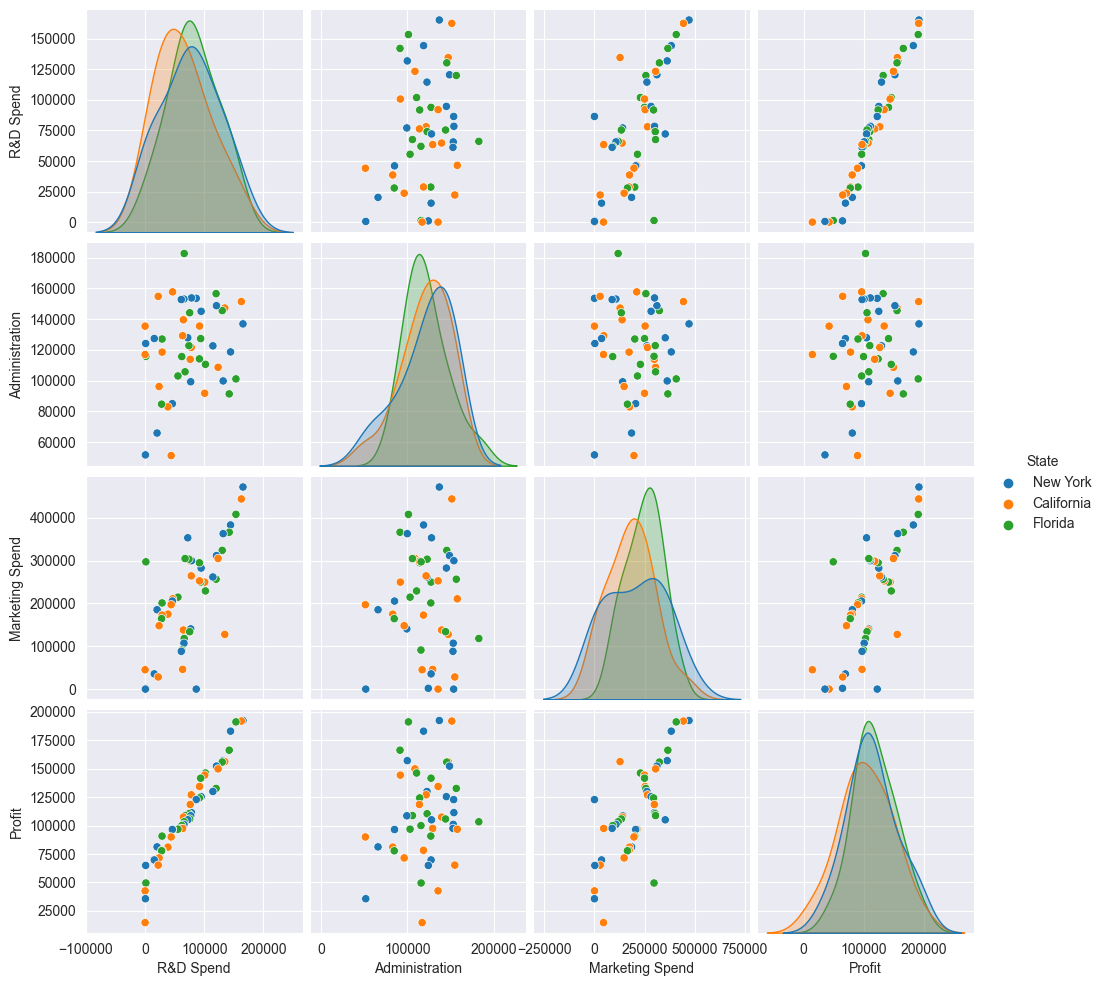

In [33]:
sns.set_style(style='darkgrid')
sns.pairplot(df, hue = 'State')
plt.show()

# Model Building

In [34]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Prft~RD+Mrkt+Adms',data=df1).fit()

# Model Testing

In [35]:
# Coefficients
model.params

Intercept    50122.192990
RD               0.805715
Mrkt             0.027228
Adms            -0.026816
dtype: float64

In [36]:
# t values and p values:
print("t Values are :\n", model.tvalues,'\n',"p Values are :\n", model.pvalues)
# from below, p values for Adms and Mrkt > 0.05, Hence we build SLR and MLR for variables Adms and Mrkt.

t Values are :
 Intercept     7.626218
RD           17.846374
Mrkt          1.655077
Adms         -0.525507
dtype: float64 
 p Values are :
 Intercept    1.057379e-09
RD           2.634968e-22
Mrkt         1.047168e-01
Adms         6.017551e-01
dtype: float64


In [37]:
# Coefficient of determination: R Squared values
print("R squared value is:\n", model.rsquared,'\n', "R squared_adjacent value is:\n",  model.rsquared_adj)
# R squared value = 94.75% , Hence we can say line is really good.

R squared value is:
 0.9507459940683246 
 R squared_adjacent value is:
 0.9475337762901719


# Simple Linear Regression Models:
 Build SLR and MLR models for insignificant variables 'Adms' and 'Mrkt'  
 Also find their tvalues and pvalues

In [38]:
ml_p=smf.ols('Prft~Adms',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    3.040044
Adms         1.419493
dtype: float64 
 P values are: 
 Intercept    0.003824
Adms         0.162217
dtype: float64


In [39]:
ml_p=smf.ols('Prft~Mrkt',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    7.808356
Mrkt         7.802657
dtype: float64 
 P values are: 
 Intercept    4.294735e-10
Mrkt         4.381073e-10
dtype: float64


In [40]:
ml_p=smf.ols('Prft~Adms+Mrkt',data = df1).fit()  
#t and p-Values
print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    1.142741
Adms         2.467779
Mrkt         8.281039
dtype: float64 
 P values are: 
 Intercept    2.589341e-01
Adms         1.729198e-02
Mrkt         9.727245e-11
dtype: float64


# Calculating VIF

In [41]:
# Exclude one variable and find VIF for each variables.
rsq_RD = smf.ols('RD~Mrkt+Adms', data = df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_Mrkt = smf.ols('Mrkt~RD+Adms', data = df1).fit().rsquared
vif_Mrkt = 1/ (1-rsq_Mrkt)
rsq_Adms = smf.ols('Adms~Mrkt+RD', data = df1).fit().rsquared
vif_Adms = 1/(1-rsq_Adms)

d = {'Variable': ['RD','Mrkt','Adms'], 'VIF': [vif_RD,vif_Mrkt,vif_Adms]}
d1 = pd.DataFrame(d)
print(d1)

  Variable       VIF
0       RD  2.468903
1     Mrkt  2.326773
2     Adms  1.175091


In [42]:
#VIF of all the variables < 20 , No collinearity.

# Residual Analysis
Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [43]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [44]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q Plot of residuals')

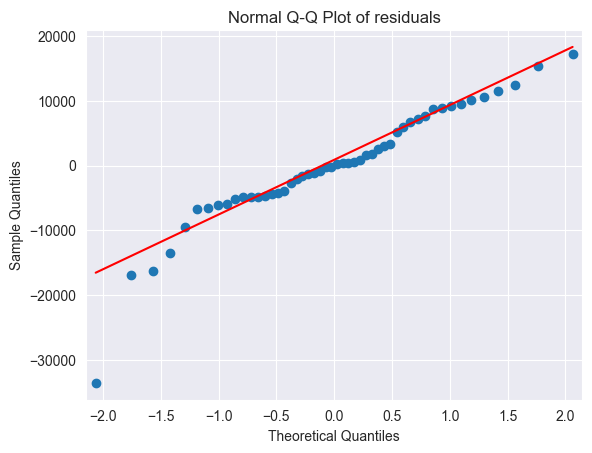

In [45]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residuals")

In [46]:
list(np.where(model.resid<-30000))  # outlier value exists below -3000 so that we use (model.resid<-30000)

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity or Heteroscedasticity

In [48]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [49]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
#get_standardized_values(df1)

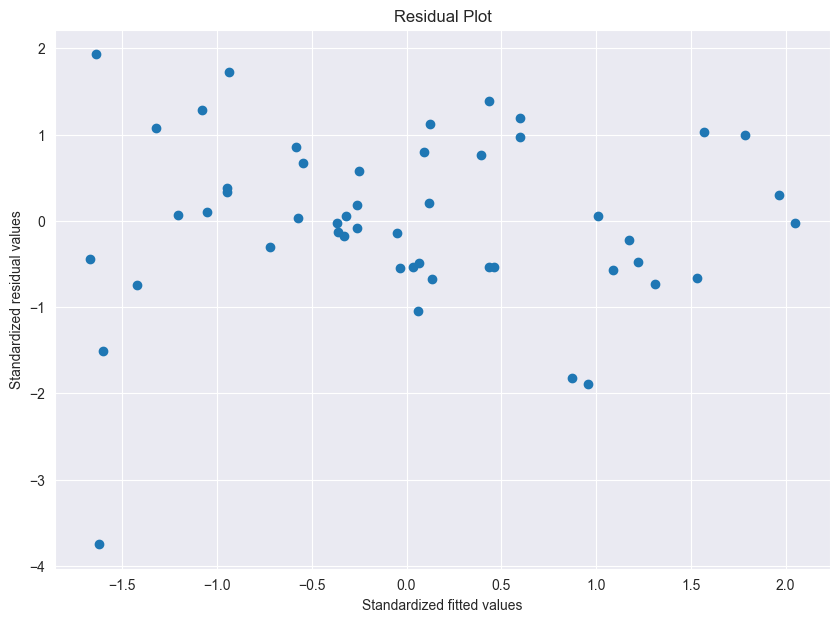

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

# Residual Vs Regressors

eval_env: 1


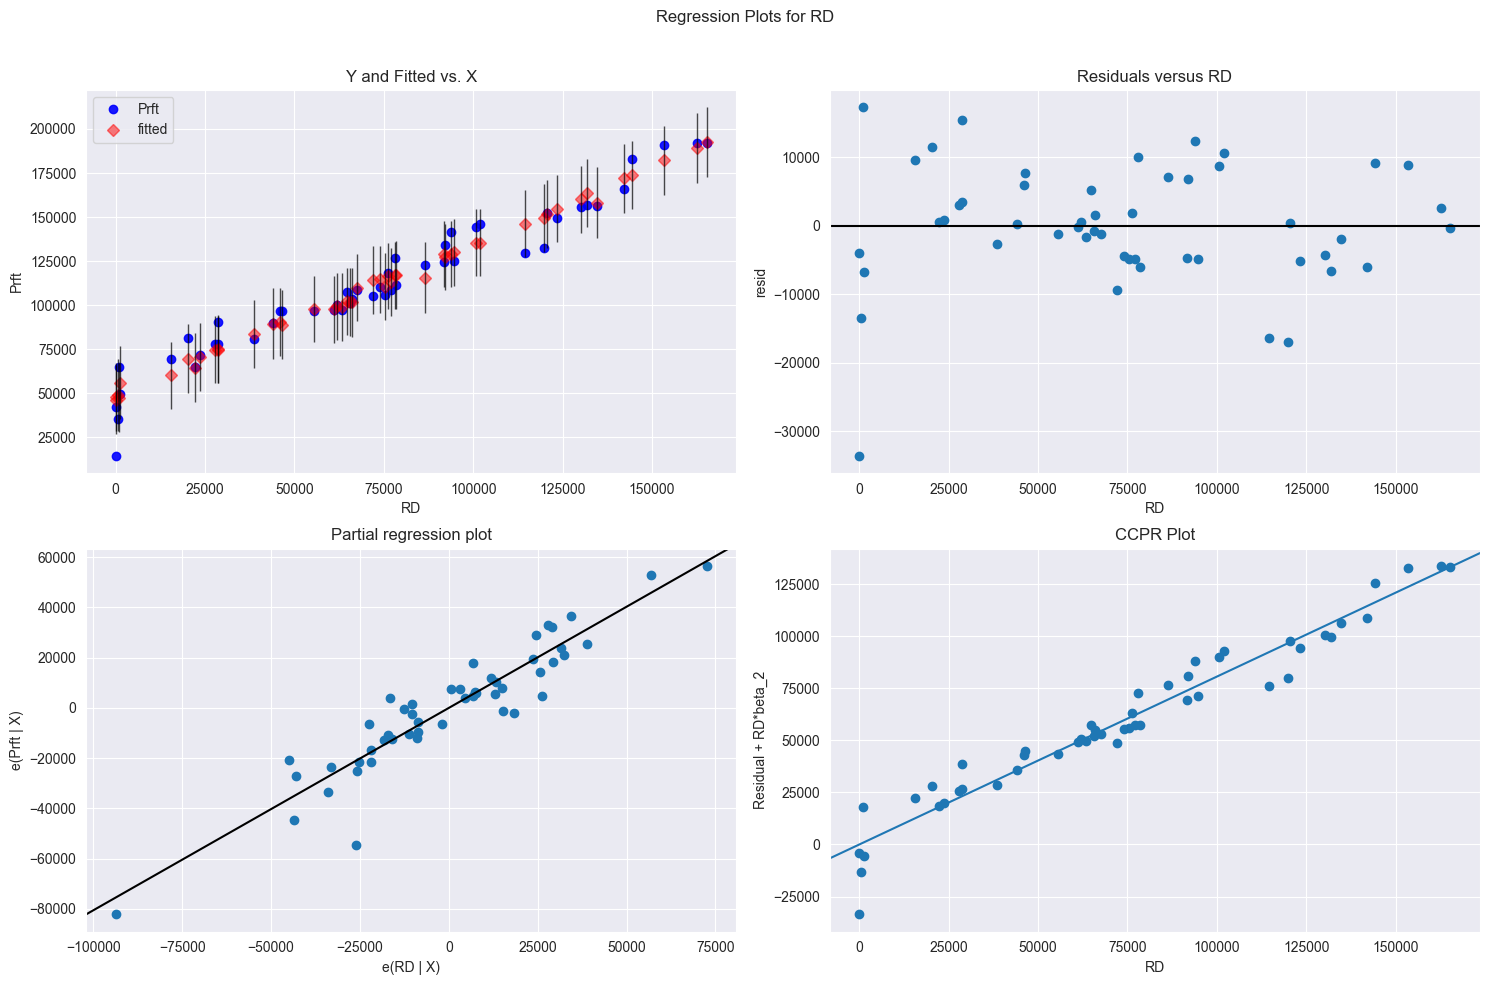

In [51]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"RD", fig = fig)
plt.show()

eval_env: 1


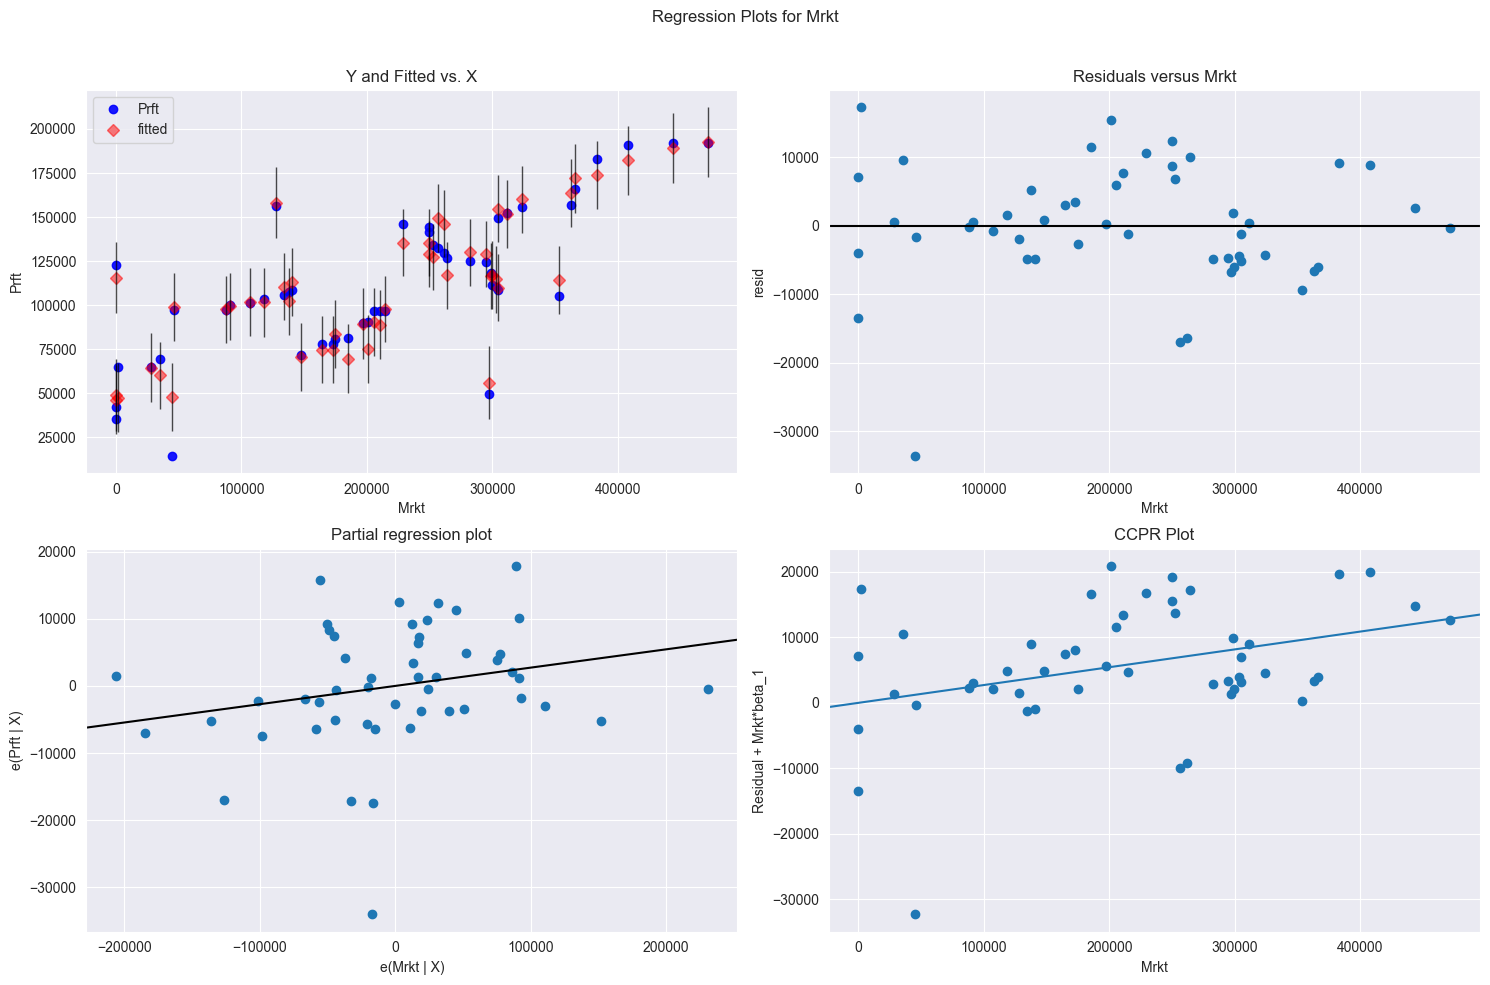

In [52]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model, "Mrkt", fig = fig)
plt.show()

eval_env: 1


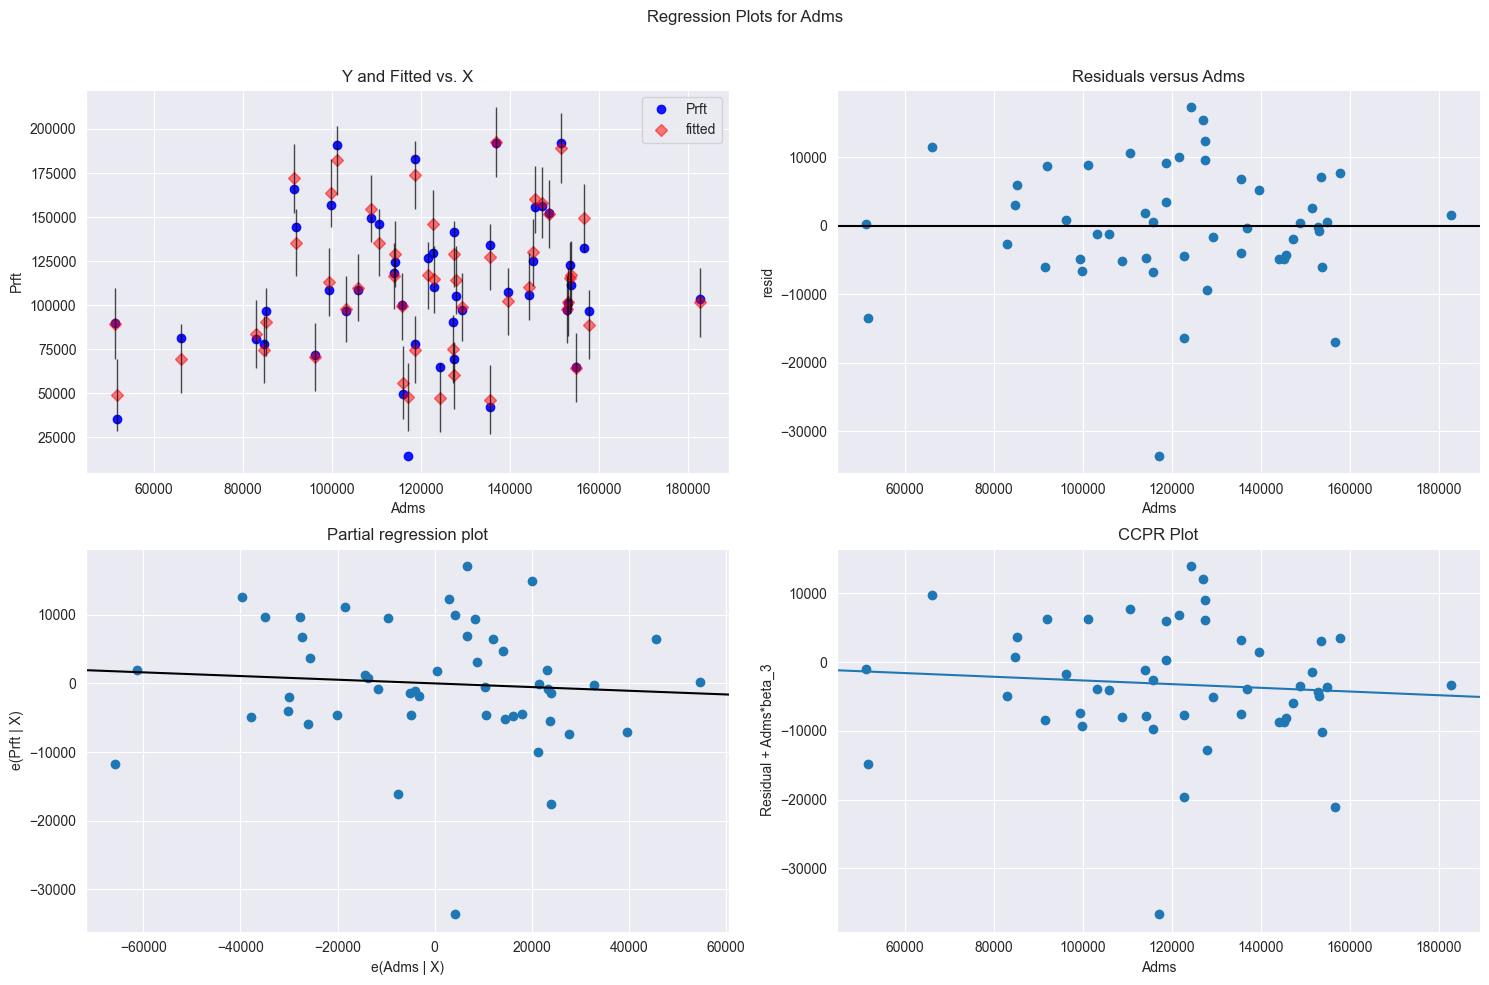

In [53]:
fig = plt.figure(figsize = (15,10))
fig =  sm.graphics.plot_regress_exog(model, "Adms", fig = fig) 
plt.show()

# Cook's Distance

In [54]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

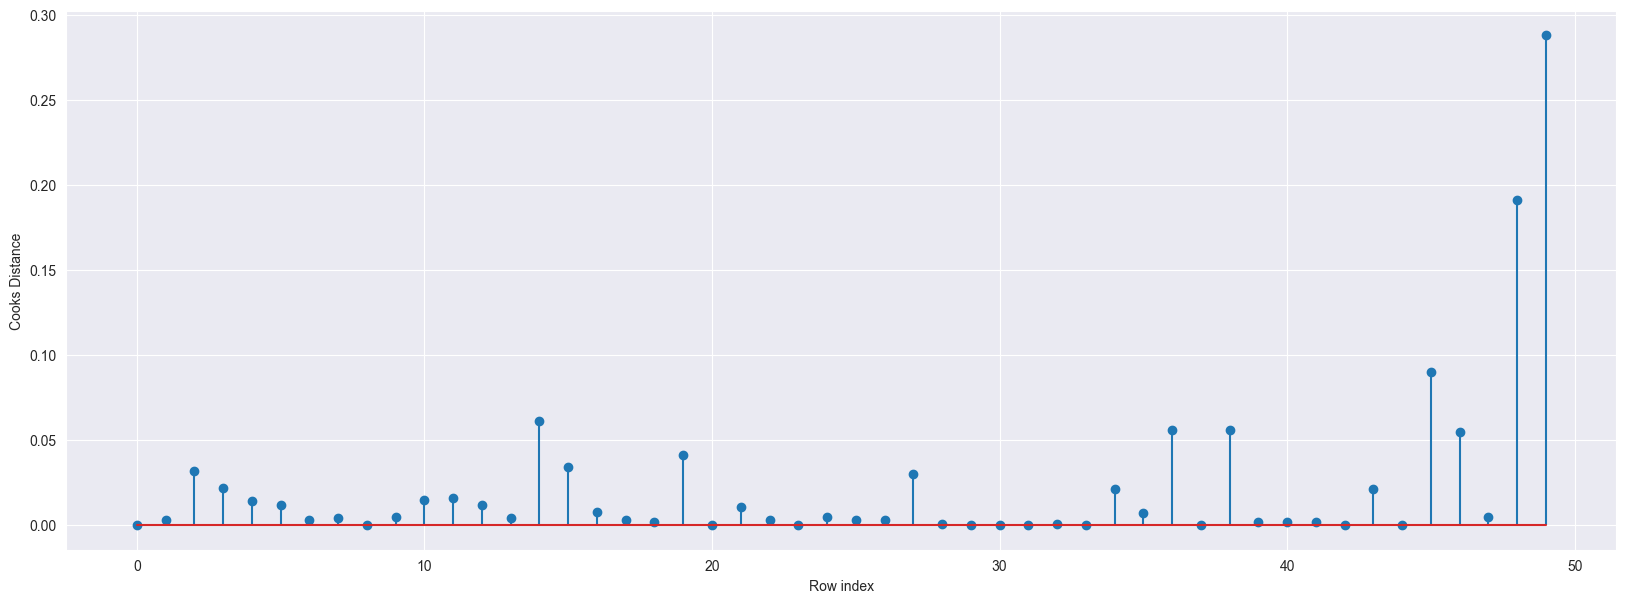

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543273)

In [57]:
df1.shape

(50, 5)

In [58]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

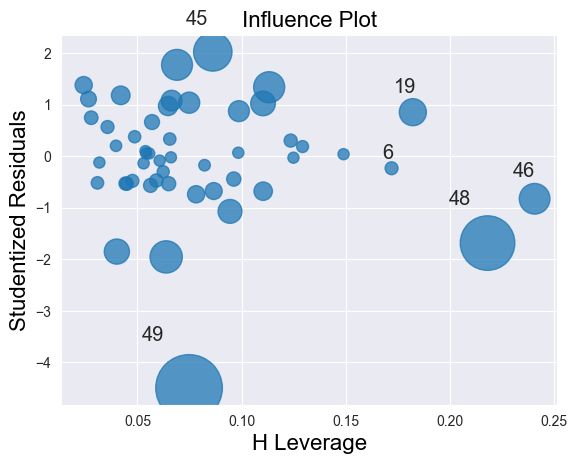

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

#y=[i for i in range(-2,8)]
#x=[leverage_cutoff for i in range(10)]
#plt.plot(x,y,'r+')
plt.show()

# From the above plot, Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

In [60]:
df1[df1.index.isin([49])]

,RD,Adms,Mrkt,State,Prft
49,0.0,116983.8,45173.06,California,14681.4


In [61]:
df2=df1.drop(df1.index[49], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
#df2

# Build Model

In [62]:
#Exclude variable "Mrkt" and generate R-Squared and AIC values
final_Adms = smf.ols('Prft~RD+Adms',data = df2).fit()

In [63]:
(final_Adms.rsquared, final_Adms.aic, final_Adms.bic)

(0.9584519070123048, 1022.0654576388338, 1027.7409185331658)

In [64]:
#Exclude variable "Adms" and generate R-Squared and AIC values
final_Mrkt= smf.ols('Prft~RD+Mrkt',data = df2).fit()

In [65]:
(final_Mrkt.rsquared, final_Mrkt.aic, final_Mrkt.bic)

(0.9610856807456628, 1018.8564801588341, 1024.531941053166)

In [66]:
##### Comparing above R-Squared and AIC values, model 'final_Mrkt' has high R- square and low AIC value 
# Hence include variable 'Mrkt' so that multi collinearity problem would be resolved.

# Cook's Distance

In [67]:
model_influence_Mrkt = final_Mrkt.get_influence()
(c_M, _) = model_influence_Mrkt.cooks_distance

Text(0, 0.5, 'Cooks Distance')

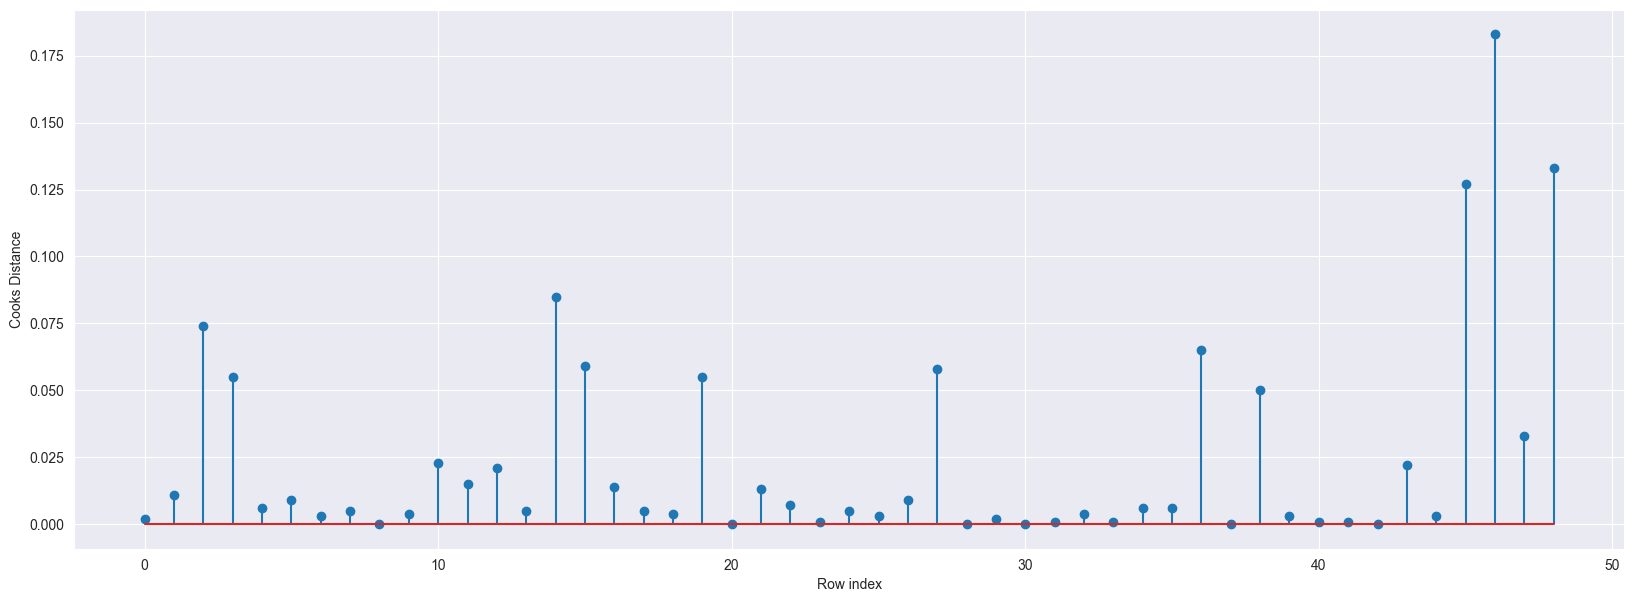

In [68]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [69]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [70]:
#Check the accuracy of the model
final_Mrkt= smf.ols('Prft~RD+Mrkt+Adms',data = df2).fit()

In [71]:
final_Mrkt.rsquared, final_Mrkt.aic

(0.9613162435129847, 1020.5652974526367)

In [72]:
# Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({"Mrkt":250000,"RD":200000,"Adms":350000},index=[1])
new_data

,Mrkt,RD,Adms
1,250000,200000,350000


In [73]:
final_Mrkt.predict(new_data)

1    207520.741579
dtype: float64

In [74]:
final_Mrkt.predict(df2.iloc[0:4,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [75]:
pred_y = final_Mrkt.predict(df2)

In [76]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing R^2 value for each prepared model

In [77]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_Mrkt.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


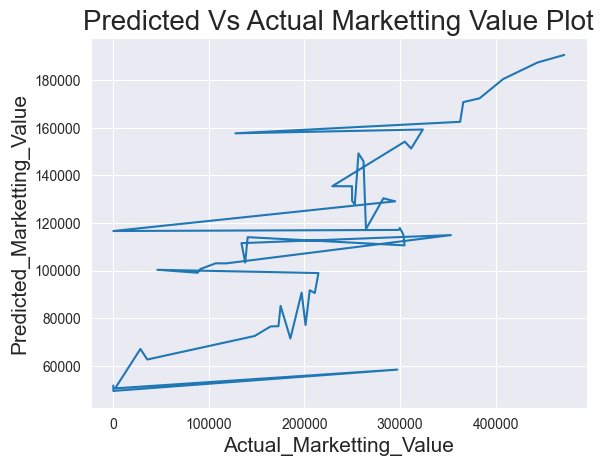

In [78]:
# Graph shows relation between Predicted and actual value
import matplotlib.pyplot as plt
df2.Mrkt # Actual Value
pred_y   # Predicted Value
plt.plot(df2.Mrkt,pred_y); plt.xlabel("Actual_Marketting_Value",size=15); plt.ylabel("Predicted_Marketting_Value",size = 15)
plt.title("Predicted Vs Actual Marketting Value Plot", size=20)
plt.show()